(Group 24)

(Benjamin Fletcher, Konrad Retzlaff, Sebastian Schmülling)

(i6308020, i6331164, i6304238)

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 2

By completing and delivering the clinic tasks you will know how to :

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in `sklearn`;
- Carry out simple logistic regression analysis;
- Evaluate classification models based on different metrics;
- Assess how your model performance can improve
- Reflect on the greater impact of the models you develop

---

## Important Dates

- Homework release: Fri, 7th Feb
- **Homework due**: Mon, 17th Feb late night (wildcards possible, apply to the group)

---

##  Some rules

* We have provided `TODO` comments in the code cells that you need to fill out with your solutions. For some questions, we have also provided `Your response` comments, where you should provide a textual answer.

* You are allowed to use any built-in Python library that is included in the `requirements.txt` for this homework. If you use any additional library, this may complicate the grading process, and we reserve the right to penalize your grade for unnecessary complexity of the solution. All the questions can be solved with the libraries in `requirements.txt`.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.



---


## Grading 
- The homework has a total of 100 points, distributed as follows:
    - Part 1: Data Preprocessing (20 points)
    - Part 2: Linear Regression (30 points)
    - Part 3: Supervised Learning (40 points)
    - Part 4: The Aftermath (5 points)

## Context

Within DACS, you are excited to start an internship as a data scientist.
After rounds of interviews, you have been selected to work with the biggest car dealership in the Netherlands !

Your mentor at the company Jerasimosu, has explained to you that the company is interested in a pricing model for used cars. 

- Jerasimosu: "We have a lot of used cars in our inventory, and we need to determine the price at which we should sell these cars. We have some ideas about the factors that influence the price of a used car, but so far we have just been using our experience and intuition to determine the price of a used car. Sometimes it works, but probably we can do better and a more data-driven approach would also help our new employees in the sales team as they have less experience."

- You: "That sounds like a great project! What kind of data do we have?"

- Jerasimosu: "We sell all kinds of cars here, but maybe we can start with a specific brand and model. For example, the Toyota Corolla is the best-selling car worldwide in 2023, and we have a lot of data on it. We can start by analyzing the data on used Toyota Corolla cars. If it works well, we can extend the analysis to other brands."

The dataset contains the following columns:

- `Age`: Age of the car in months.
- `Mileage`: Number of distance the car has been driven. (km or miles)
- `FuelType`: Fuel type of the car (Petrol, Diesel, or CNG)
- `HP`: Horsepower
- `MetColor`: Is the color of the car metallic? (Yes=1, No=0)
- `Automatic`: Is the car automatic? (Yes=1, No=0)
- `CC`: Cylinder volume in cubic centimeters
- `Doors`: Number of doors
- `Weight`: Weight of the car in kilograms
- `Price`: Price of the car in euros


## Data

The data is provided in the `data` folder and it contains the following 3 csv files:
- `Task1-2.ToyotaCorolla.csv` for Part 1 and Part 2
- `Task3.ToyotaCorolla_sales_3months.csv` for Part 3

You should not use any other data source for this homework.

For some questions, you might need to slightly modify the data. But overall, you should avoid making any major changes to the data, which may affect your analysis.

## References:

The data is based on the ToyotaCorolla dataset from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Toyota+Corolla).
We have made some modifications to the original dataset, so please use the data provided in the `data` folder in the course repo.

## Task 1 (20 pts) - Get to know the data

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import sklearn

# fix random seed for reproducibility
np.random.seed(42)
random.seed(42)

#added by us
# Expand display options
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_colwidth", None)  # Do not truncate column text
pd.set_option("display.expand_frame_repr", False)  # Avoid line wrapping


**1.1 (2 pts)**: Load the data from the file `Task1-2.ToyotaCorolla-raw.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. Hint: A naive loading of the data will raise an error. You will need to figure out how to load the data correctly. (Hint: localise which row is causing the error)

In [134]:
#TODO

# 1. Load the data
# error handling: In line 33 there were 12 instead of 11 columns. This was because of a comma in the Price column. Commas are common in larger numbers as a seperator.
# In this case this was a mistake which lead to the wrong interpretation of another column. The comma was removed and the file was saved again. 
df_corolla = pd.read_csv('data/Task1-2.ToyotaCorolla.csv')
df_corolla_origin = pd.read_csv('data/Task1-2.ToyotaCorolla.csv')
df_corolla.head(5)

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23.0,46986.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,EURO
1,11878.0,23.0,72937.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
2,12050.0,24.0,41711.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
3,12914.0,26.0,48000.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1165.0,CHF
4,11878.0,30.0,38500.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1170.0,CHF


In [135]:
df_corolla.dtypes

Price         object
Age          float64
Mileage       object
FuelType      object
HP           float64
MetColor     float64
Automatic    float64
CC           float64
Doors        float64
Weight       float64
Currency      object
dtype: object

**1.2 (2 pts)**: Check if there are nan values in the Dataframe. If there are, try to find out which row is problematic and fix it. If you can't fix it, drop the row.

In [136]:
#TODO

index_list = []

for index, row in df_corolla.iterrows():
    if row.isna().any():
        print(index,row)
        index_list.append(index)
#print(index_list)

#seems there is an issue with the comma type in row 906. Let's check it out

row = df_corolla.iloc[index_list[0]]
type(row)
#print(row)


if isinstance(row['Price'], str) and ';' in row['Price']:
    # Split the string into individual parts:
    split_values = row['Price'].split(';')


#print(split_values)

columns = df_corolla.columns

#print(df_corolla.dtypes)

for col, val in zip(columns, split_values):

    if (df_corolla[col].dtype == np.float64) : 

        converted_val = float(val)
        df_corolla.at[index_list[0], col] = converted_val
    else:
        df_corolla.at[index_list[0], col] = val
    

print("\nFixed row:\n\n",df_corolla.iloc[index_list[0]])



# Validate that there are no more NaN values in the dataset

index_list = []

for index, row in df_corolla.iterrows():
    if row.isna().any():
        print(index,row)
        index_list.append(index)
print("\nRows with nan values:",len(index_list))

906 Price        8423.0;68;58860.0;Petrol;110;1;0;1600;3;1055;CHF
Age                                                       NaN
Mileage                                                   NaN
FuelType                                                  NaN
HP                                                        NaN
MetColor                                                  NaN
Automatic                                                 NaN
CC                                                        NaN
Doors                                                     NaN
Weight                                                    NaN
Currency                                                  NaN
Name: 906, dtype: object

Fixed row:

 Price         8423.0
Age             68.0
Mileage      58860.0
FuelType      Petrol
HP             110.0
MetColor         1.0
Automatic        0.0
CC            1600.0
Doors            3.0
Weight        1055.0
Currency         CHF
Name: 906, dtype: object

Rows with nan valu

**1.3 (4 pts): Compute the mean, median of the `Price` column.**

- Compute the mean and median of the `Price` column. If you encounter error, try to understand why this error is happening and propose a solution.

Hint: Is all values in the `Price` column numerical?


In [137]:
#TODO

# 1. follow hint 

print(df_corolla.dtypes)

#One can see thta the column "Price" is of type object. This is because the column contains strings with currency symbols and commas.
#After inspecting the column "Price" manually there is some data cleaning necessary before we can convert the column to a float.

#Proposed solution. Remove all commas and currency symbols from the column "Price" and convert it to a float.
df_corolla['Price'] = df_corolla['Price'].str.replace(',', '', regex=False)\
                                           .str.replace('"', '', regex=False)\
                                           .str.replace('$', '', regex=False)\
                                           .str.replace('€', '', regex=False)\
                                           .str.replace('£', '', regex=False)\
                                           .astype(float)

#3. calculate the mean and median

mean_price = df_corolla['Price'].mean()
median_price = df_corolla['Price'].median()

print("\n\nMean price:",mean_price)
print("Median price:",median_price)

#4. After observing that the the mean price is absurdly high, compared to the prices that are settled around 10k, one can find an outlier in row 34:    1.539850e+16.
#   Inspecting the row in the csv file, once can see that the price is 15.398,50. Howevever, it is written in an unreasonable format as a string: "15,398,499999999998".
#   We simply corrected the entry manually.

#print(df_price.iloc[1120])
#df_price.head(100)
#print("Sorted values:\n",df_price['Price'].sort_values())

# Now the mean and median prices are more reasonable



Price         object
Age          float64
Mileage       object
FuelType      object
HP           float64
MetColor     float64
Automatic    float64
CC           float64
Doors        float64
Weight       float64
Currency      object
dtype: object


Mean price: 9439.505809951286
Median price: 8595.0


**1.4 (4 pts): Convert Units**

You notice that some prices are in CHF (Swiss Francs), while others are in EUR (Euros) or GBP (British Pounds). Additionally, for cars priced in GBP, the mileage is in miles rather than kilometers.

For consistency, convert all prices to EUR and all distances to kilometers.

- Exchange rates:
  - 1 CHF = 1.05 EUR
  - 1 GBP = 1.15 EUR
  - 1 mile = 1.61 km

Make the following conversions:
1. Convert prices in CHF or GBP to EUR, rounding to the nearest integer.
2. Convert distances in miles (for GBP cars) to kilometers, rounding to the nearest integer.
3. Drop the 'Currency' column.
4. Calculate the min, mean, median and max of the 'Price' and 'Distance' columns after the conversion.

In [138]:
#TODO


#step 1 ,conversion of prices
rates = {'CHF': 1.05, 'EURO': 1.00, 'GBP': 1.15}
df_corolla['Price'] = df_corolla.apply(lambda r: int(round(r['Price'] * rates[r['Currency']])), axis=1)



#step 2, conversion of mileage

#but first data cleaning and conversion  of the column "Mileage" to float (necessary for the conversion, after conversion it will be casted to int)

df_corolla['Mileage'] = df_corolla['Mileage'].str.replace(',', '', regex=False)\
                                           .str.replace('"', '', regex=False)\
                                           .str.replace(r'[^0-9.]', '', regex=True)\
                                           .astype(float)

df_corolla.iloc[34]
gbp_mask = df_corolla['Currency'] == 'GBP'
df_corolla.loc[gbp_mask, 'Mileage'] = df_corolla.loc[gbp_mask, 'Mileage'] * 1.61
df_corolla['Mileage'] = df_corolla['Mileage'].round().astype(int)

#step 3, drop the currency column

df_corolla.drop(columns=['Currency'], inplace=True)

#step 4, calculate statistics

print('Price min:', df_corolla['Price'].min())
print('Price mean:', df_corolla['Price'].mean())
print('Price median:', df_corolla['Price'].median())
print('Price max:', df_corolla['Price'].max())

print('Distance min:', df_corolla['Mileage'].min())
print('Distance mean:', df_corolla['Mileage'].mean())
print('Distance median:', df_corolla['Mileage'].median())
print('Distance max:', df_corolla['Mileage'].max())

Price min: 3946
Price mean: 9879.322894919973
Price median: 9025.0
Price max: 29478
Distance min: 1
Distance mean: 68491.0925539318
Distance median: 63328.0
Distance max: 243000


**1.5 (2 pts): Analyze Average Price**

A.  Print the average price for each fuel type. Determine which fuel type has the highest average price.

B.  Print the average price for different numbers of doors. Determine which number of doors has the highest average price.

In [139]:
#TODO

avg_price_by_fuel = df_corolla.groupby('FuelType')['Price'].mean()
print(avg_price_by_fuel)
print("Highest average price by fuel:", avg_price_by_fuel.idxmax())

avg_price_by_doors = df_corolla.groupby('Doors')['Price'].mean()
print(avg_price_by_doors)
print("Highest average price by doors:", avg_price_by_doors.idxmax())


FuelType
CNG        8752.176471
Diesel    10366.490323
Petrol     9834.777866
Name: Price, dtype: float64
Highest average price by fuel: Diesel
Doors
2.0     7347.000000
3.0     9320.285714
4.0     9024.297101
5.0    10578.637982
Name: Price, dtype: float64
Highest average price by doors: 5.0


**1.6 (2 pts): Relationship Between Car Age and Price**

It is intuitive that an older car tends to be cheaper, and a car with more mileage might also be less expensive. 

To explore this intuition, create two scatter plots:
1. Car Age vs Price
2. Mileage vs Price

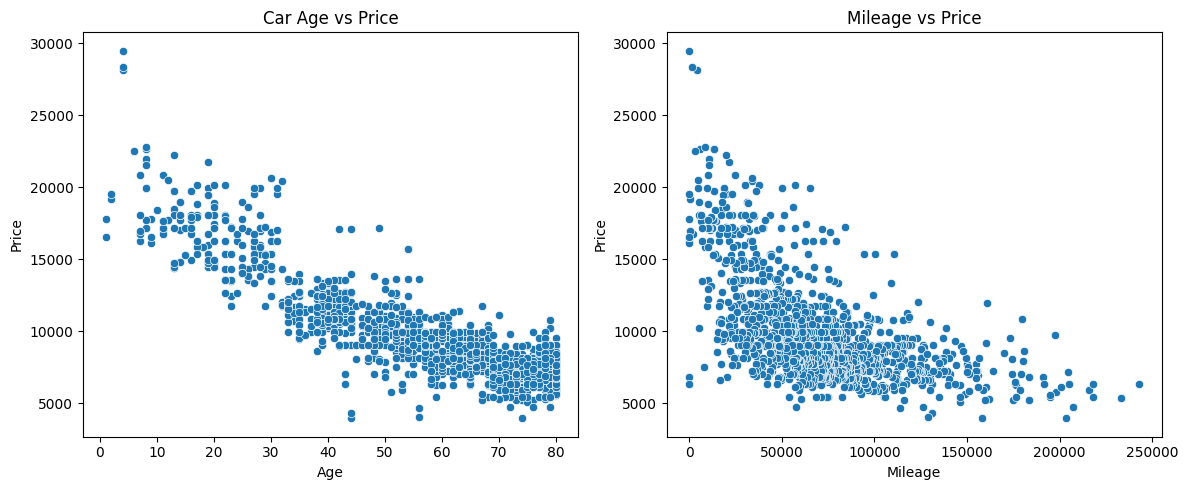

In [140]:
#TODO
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='Age', y='Price', data=df_corolla)
plt.title('Car Age vs Price')

plt.subplot(1,2,2)
sns.scatterplot(x='Mileage', y='Price', data=df_corolla)
plt.title('Mileage vs Price')

plt.tight_layout()
plt.show()

**1.7 (4 pts): Correlation Between Price and Mileage**

The relationship between car price and mileage appears non-linear, with a steeper price drop initially followed by a flatter curve.

A.(2 pts)  Calculate both the Pearson and Spearman correlations between the price of the car and the distance driven.


In [141]:
#TODO

pearson_corr = df_corolla['Price'].corr(df_corolla['Mileage'], method='pearson')
spearman_corr = df_corolla['Price'].corr(df_corolla['Mileage'], method='spearman')

print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)

Pearson correlation: -0.5635094857323714
Spearman correlation: -0.6043701109847422



B.(2 pts)  Which correlation value is higher? Does this result align with your expectations?

Your Response:

From the plots one could already see a negative correlation between mileage and price. This supports our intuition that car with more mileage tend to be less expensive. 
For the pearson correlation we know that -1 indicates a perfect negative linear correlation. Since our correlation is negative, but not perfectly linear negative this was to be ecpected. As mentioned this is clearly viewable in the scatter plot from above.
The correlation value of the Spearman corelation value is higher. It assesses how well the relationship between two variables can be described using a monotonic function. It is based on the ranked values for each variable rather than the raw data. 
Thus the intuition would also say that this correlation value should be higher because it measures no linear relationship, but rather the ranked values. And as we can, the scatter plot gives a hint of non-linearity.

## Part 2 Linear Regression (30 pts)

You want to build a linear regression model to predict the price of a car based on the features you have.



**2.0 (8 pts) Helper functions**

Before building the linear regression model, you need to implement some helper functions.

 Implement the `accuracy` , `precision`, `recall` and `f1_score` functions. 

1. These functions should take in the true labels(`np.array`) and the predicted labels(`np.array`) and return the corresponding metric. 
2. They should follow the convention that the positive class is 1 and the negative class is 0.
3. Apply the functions to the following data:

```python
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])
```

- Compare the results with the implementation in `sklearn` and see if they match.

In [142]:
#TODO

true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

# Accuracy function for classification
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Precision function (for binary classification)
def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    return tp / (tp + fp) if (tp + fp) > 0 else 0

# Recall function (for binary classification)
def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
    return tp / (tp + fn) if (tp + fn) > 0 else 0

# F1-score function
def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy Helperfunction:", accuracy(true_labels, predicted_labels))
print("Accuracy Sklearn:", accuracy_score(true_labels, predicted_labels))
print("Precision Helperfunction:", precision(true_labels, predicted_labels))
print("Precision Sklearn:", precision_score(true_labels, predicted_labels))
print("Recall Helperfunction:", recall(true_labels, predicted_labels))
print("Recall Sklearn:", recall_score(true_labels, predicted_labels))
print("F1 Score Helperfunction:", f1_score(true_labels, predicted_labels))
print("F1 Score Sklearn:", f1_score(true_labels, predicted_labels))
print(df_corolla.shape)

Accuracy Helperfunction: 0.7
Accuracy Sklearn: 0.7
Precision Helperfunction: 0.6666666666666666
Precision Sklearn: 0.6666666666666666
Recall Helperfunction: 0.8
Recall Sklearn: 0.8
F1 Score Helperfunction: 0.7272727272727273
F1 Score Sklearn: 0.7272727272727273
(1437, 10)



**2.1 (6 pts) Preprocess the Data**

To prepare your data for building a linear regression model, complete the following steps:

A.(1 pts) Convert the categorical variables to one-hot encoding using the `pd.get_dummies()` function, how many columns do you have after the one-hot encoding? (P.S. You may want to avoid introducing multicollinearity with one-hot encoding, what should you do to avoid this?)


In [143]:
#TODO

#Add OHE
print(df_corolla.shape)
df_corolla= pd.get_dummies(df_corolla)
print(df_corolla.shape)

non_numeric_cols = df_corolla.select_dtypes(exclude=['number']).columns

# Convert boolean/non-numeric columns to 0 and 1
df_corolla[non_numeric_cols] = df_corolla[non_numeric_cols].astype(int)

df_corolla.head()





(1437, 10)
(1437, 12)


,Price,Age,Mileage,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986,90.0,1.0,0.0,2000.0,3.0,1165.0,0,1,0
1,12472,23.0,72937,90.0,1.0,0.0,2000.0,3.0,1165.0,0,1,0
2,12652,24.0,41711,90.0,1.0,0.0,2000.0,3.0,1165.0,0,1,0
3,13560,26.0,48000,90.0,0.0,0.0,2000.0,3.0,1165.0,0,1,0
4,12472,30.0,38500,90.0,0.0,0.0,2000.0,3.0,1170.0,0,1,0


## Comment by us:

We check for Multicollinearity by first visualizing the correlation and then check for the VIf factors. If the VIF is above 10, we would drop the column with the highest VIF.

<Axes: >

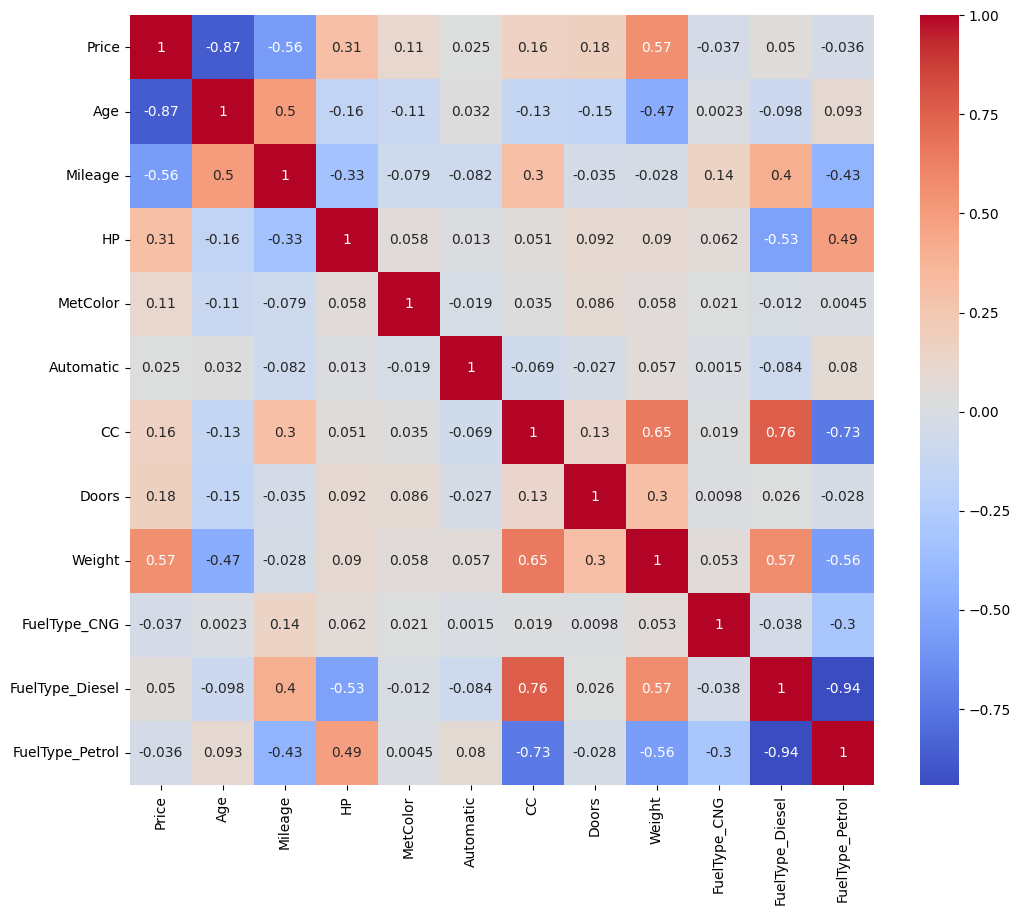

In [144]:
#Check for Multicollinearity
correlation_matrix = df_corolla.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
# If you have a target column, remove it to focus only on predictors
X = df_corolla.drop('Price', axis=1)  # Replace 'target' with your actual target variable name

# Create a DataFrame to store VIF values for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            Feature          VIF
0               Age     1.935248
1           Mileage     2.001507
2                HP     6.163842
3          MetColor     1.022373
4         Automatic     1.076553
5                CC     8.633842
6             Doors     1.207314
7            Weight     3.323166
8      FuelType_CNG    16.680566
9   FuelType_Diesel   205.687995
10  FuelType_Petrol  1084.561776


In [ ]:
df_corolla = df_corolla.drop(columns=['FuelType_Petrol'])

#we drop it since first it has an extremely high VIF and secondly it can be derived from other fuel types.

B.(1 pts) Split the data into features (X) and target (y) variables. The target variable is the 'Price' column. Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. How many samples are in the training set and how many samples are in the test set?


In [147]:
#TODO

X = df_corolla.drop('Price', axis=1)
y = df_corolla['Price']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1149, 10), (288, 10), (1149,), (288,))

C.(1 pts) Why do we split the data into only train-test sets but not train-validation-test sets? 

Your Response:
We split the data into train-test sets to train the model on the training set and evaluate it on the test set. The validation set is used to tune the hyperparameters of the model. In this case, we are not tuning any hyperparameters, so we only need the train-test split.
//**// 

D.(1 pts) **Standardize the Features**: Use `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`. Print the average and standard deviation of the training set after standardization.

In [148]:
from sklearn.preprocessing import StandardScaler
#TODO



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Convert the scaled training data back to a DataFrame
df_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

#add constant
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Calculate column-wise mean and std
stats = df_scaled.agg(['mean', 'std']).T

print(stats)

#Has to be fixed

                         mean       std
Age             -6.802411e-17  1.000435
Mileage         -2.473604e-17  1.000435
HP              -5.565609e-17  1.000435
MetColor        -4.638007e-17  1.000435
Automatic       -4.328807e-17  1.000435
CC               2.736424e-16  1.000435
Doors           -2.164403e-16  1.000435
Weight          -1.402997e-15  1.000435
FuelType_CNG    -1.082202e-17  1.000435
FuelType_Diesel  0.000000e+00  1.000435


E.(2 pts) Should we first standardize the data and then split it into train and test sets or vice versa?   why?

Your Response:

You should split the data into train and test sets first, and then standardize using parameters (mean and standard deviation) calculated from the training data. This prevents any information from the test set from leaking into the model during preprocessing. In short, splitting first helps maintain the integrity of the evaluation by ensuring that the test data remains completely unseen during model training.

**2.2 (10 pts) Train and Evaluate the Linear Regression Model**

To train a linear regression model using and evaluate its performance, follow these steps:

1. (2 pts) Train a linear regression model on the training dataset using `sm.OLS` from `statsmodels`, print the summary of the model using `model.summary()`.


In [149]:
#TODO

model = sm.OLS(y_train, X_train)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     662.8
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:35:17   Log-Likelihood:                -9852.5
No. Observations:                1149   AIC:                         1.973e+04
Df Residuals:                    1138   BIC:                         1.978e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6505.8390   1480.656     

2. (2 pts) Evaluate the model on the test dataset using the square root of the mean squared error (RMSE) metric. 
   1. Report the RMSE value.
   2. Your boss wants to know how far off the model's predictions are from the actual price of the car. What would you tell him? Given a number and explain how you got it.


In [150]:
#TODO

# Make predictions on the test set with RMSE
from sklearn.metrics import mean_squared_error

y_pred = results.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

#mae
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

#mape
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)



RMSE: 1441.5672840314041
MAE: 970.0339225662088
MAPE: 10.248785357747222


Your Response:
The model’s predictions for car prices show an average error of about 970 currency units, meaning that, on average, the predicted price is off by this amount. When looking at the error as a percentage of the actual price, the model is about 10.25% off on average, meaning that if a car costs 15,000, the predicted price could typically be around 1,500 units higher or lower. While this level of accuracy is reasonable, there is room for improvement. I would suggest to my boss that the model might benefit from refining feature selection, addressing potential nonlinear relationships, or testing additional transformations to better capture price variations.
//**//

3. (2 pts) Report the R² score on the test dataset and interpret it.


In [151]:
#TODO

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)

R2 Score: 0.8243438398317844


Your Response:
The R² score measures how well the model explains the variance in the target variable. An R² value of 0.8243 indicates that approximately 82.43% of the variation in car prices can be explained by the model. This suggests that the model captures the relationship between the predictors and price quite well, though there is still 17.57% of the variance left unexplained. 
//**//

4.  (2 pts) Which features are statistically significant at a 5% significance level? 

In [152]:
#TODO

df_results = results.summary()

#get results that are <= 0.05
significant_results = df_results.tables[1].data
significant_results = pd.DataFrame(significant_results[1:], columns=significant_results[0])

print(significant_results)

                           coef    std err          t   P>|t|     [0.025     0.975]
0             const  -6505.8390   1480.656     -4.394   0.000  -9410.962  -3600.716
1               Age   -112.0511      2.847    -39.357   0.000   -117.637   -106.465
2           Mileage     -0.0135      0.001     -9.533   0.000     -0.016     -0.011
3                HP     35.2822      6.582      5.361   0.000     22.368     48.196
4          MetColor     46.3858     81.294      0.571   0.568   -113.117    205.889
5         Automatic    -63.6794    171.639     -0.371   0.711   -400.444    273.086
6                CC     -2.5655      0.608     -4.218   0.000     -3.759     -1.372
7             Doors    -42.7203     44.280     -0.965   0.335   -129.599     44.159
8            Weight     22.5114      1.476     15.249   0.000     19.615     25.408
9      FuelType_CNG  -1180.5232    329.119     -3.587   0.000  -1826.272   -534.774
10  FuelType_Diesel    380.8913    501.490      0.760   0.448   -603.058   1

Your Response:
Response from Q above: The features that are statistically significant at a 5% significance level (p-value ≤ 0.05) are Age, Mileage, HP, CC, Weight, and FuelType_CNG, as their p-values are below 0.05. These variables have a statistic significant impact on car price predictions. The test basically determines the prob. of the coef. being zero.
//**//

5.  (2 pts) Determine which two feature have the highest coefficient? What does it imply?

Response from 5: Weight and Horsepower (HP) have the highest coefficients. This implies that people care both about the weight of the car due to durability, or that heavier cars are larger (use more material) etc. In regards to horsepower, it is very logical as more powerful cars tend to be more expensive (think Porsche vs Volkswagen).

**2.3 (2 pts): Improvement Discussion**

- Suggest a few additional features that could potentially explain this remaining variance in the data ( at least 2 features).

Your Response:
I would say that the brand is definitely important. Certain car makes can charge a lot more simply because of the brand image. In the case of the VW Group (consisting of Skoda, VW, Porsche, Audi, Lamborghini and Bugatti). VW reuses a lot of engines from VW in both Skoda and Audi, however audis will always be more expensive, and Skodas will always be cheaper, due to the percieved brand value which isn't considered in this data. Another important factor to consider is the service history. We did consider the miles driven, however a non-existant or low service history will always make the car cheaper, and a more thorough service history means the car has been well taken care of and is less likely to present problems in the future, which will add a price premium.
//**//

**2.4 (2 pts): Identifying Confounding Variables**

The feature "Weight" shows a very low p-value and a high coefficient, but it doesn't seem to be a major factor for customers buying a second-hand car. You go to your mentor Jerasimosu to discuss this issue. Indeed, Jerasimosu suggests that never in his career has he seen a customer who asked for the weight of a car before buying it.
You suspect that there might be a confounding variable that is correlated with the car's weight and significantly influences its price.

- Suggest a possible confounding variable that may be correlated with the car's weight and significantly influence its price (it doesn't need to be a variable in the dataset). Explain why this variable could be a confounding variable.

Your Response:
A possible confounding variable could be the car's size or type (SUV, sedan, hatchback, etc.). Heavier cars tend to be larger, and larger vehicles—such as SUVs and luxury sedans—typically cost more than smaller compact cars. The weight itself may not directly influence price, but it is correlated with the car’s size, which in turn affects pricing due to factors like safety features, fuel efficiency, and brand positioning. Since buyers consider vehicle type rather than weight when making a purchase, size/type serves as a confounding variable, influencing both weight and price without being explicitly accounted for in the model.
//**//

**2.5 (2 pts): Adding an Inverse Mileage Term**

From the previous scatter plot, the relationship between car price and mileage appears non-linear, with a steep price drop initially and then a flattening. A suitable approach to model this behavior is by incorporating an inverse term of mileage.

- Add the inverse mileage term to the model and retrain it using the code provided. Print the model summary and interpret the effect of the inverse mileage term.

In [ ]:
#TODO

#Add the inverse mileage term to the model and retrain it using the code provided. Print the model summary and interpret the effect of the inverse mileage term.

df_corolla['InverseMileage'] = 1 / df_corolla['Mileage']

X = df_corolla.drop('Price', axis=1)
y = df_corolla['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train)

results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     606.1
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:35:17   Log-Likelihood:                -9849.2
No. Observations:                1149   AIC:                         1.972e+04
Df Residuals:                    1137   BIC:                         1.978e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6826.9211   1482.259     

The inverse mileage term is significant and negative, meaning lower mileage (higher inverse) is linked to higher prices. This term captures the steep price drop at low mileage and the leveling off at high mileage.

## Part 3 Supervised Learning (40 pts)


After completing your analysis, you're satisfied with the results. You handed the Jupyter notebook over to your mentor.

(Fun fact: The name "Jupyter" is derived from Julia, Python, and R—three programming languages that the platform was originally designed for.)

Your mentor Jerasimosu is very impressed with your work and asks you the following question:

“
This looks great! It will be very useful for our sales team. While looking at the results, I realized that there might be one thing that we can improve. 
For companies like us, it is important to sell the cars quickly. If we are patient, we might be able to sell the car for a higher price, but that’s not always the best strategy. We need to consider the maintenance costs for the car, the cash flow and the fact that the price of the car decreases over time."

He then continues:
"Three months is a sweet spot for us. If we can sell the car within the first three months, it is great. If not, it is worth considering lowering the price to sell it faster and increase our cash flow. I can ask Ivan from Sales to collect data in the last few months on whether the car was sold within the first three months or not. This would be great if you could have a model that tells us if the car will be sold in the first three months or not. "

This sparks your interest, and soon Ivan has provided you with the new data containing an additional column `sold_within_3_months` which is a binary variable indicating whether the car was sold within the first three months or not.

Note: The data for this part is in the file `Task3.ToyotaCorolla_sales_3months.csv` and it has already unified the currency and distance units.

In [154]:
data_df = pd.read_csv('data/Task3.ToyotaCorolla_sales_3months.csv', index_col=0)
print(data_df.head())

   Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight  sold_within_3_months
0  13500   23  46986   Diesel  90         1          0  2000      3    1165                     0
1  13750   23  72937   Diesel  90         1          0  2000      3    1165                     0
2  13950   24  41711   Diesel  90         1          0  2000      3    1165                     0
3  14950   26  48000   Diesel  90         0          0  2000      3    1165                     0
4  13750   30  38500   Diesel  90         0          0  2000      3    1170                     0


In [155]:
#duplicate check
duplicates = data_df.duplicated()
print("Duplicates:", duplicates.sum())

#drop duplicates
data_df = data_df.drop_duplicates()

Duplicates: 1



**3.1 (2 pts): Preprocess the Data**
- （1 pts）How many cars in the dataset were sold in the first three months, and how many were not? 

In [156]:
#TODO

sold_first_three_months = data_df['sold_within_3_months'].sum()

sold_later = data_df.shape[0] - sold_first_three_months


print("Shape:", data_df.shape)  
print("Sold in the first three months:", sold_first_three_months)
print("Sold later:", sold_later)

Shape: (1435, 11)
Sold in the first three months: 880
Sold later: 555


- (1 pts) Preprocess the categorical variables to one-hot encoding using the `pd.get_dummies()` function.

In [157]:
#TODO

data_df = pd.get_dummies(data_df, drop_first=True)

# FuelType_Diesel & FuelType_Petrol should be binary
data_df['FuelType_Diesel'] = data_df['FuelType_Diesel'].astype(int)
data_df['FuelType_Petrol'] = data_df['FuelType_Petrol'].astype(int)

print(data_df.head())

print(data_df['sold_within_3_months'].sum())

   Price  Age     KM  HP  MetColor  Automatic    CC  Doors  Weight  sold_within_3_months  FuelType_Diesel  FuelType_Petrol
0  13500   23  46986  90         1          0  2000      3    1165                     0                1                0
1  13750   23  72937  90         1          0  2000      3    1165                     0                1                0
2  13950   24  41711  90         1          0  2000      3    1165                     0                1                0
3  14950   26  48000  90         0          0  2000      3    1165                     0                1                0
4  13750   30  38500  90         0          0  2000      3    1170                     0                1                0
880


**3.2 (20 pts):  Logistic Regression Model**
1. (2 pts) Split the data into features (X) and target (y) variables. The target variable is the 'sold_within_3_months' column. The `Price` column should be included as a feature.

In [158]:
#TODO

X = data_df.drop('sold_within_3_months', axis=1)
y = data_df['sold_within_3_months']

2. (2 pts) Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. 

In [159]:
#TODO
#stratification is very important to ensure consistent training and comparison
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

3. (2 pts) Standardize the features using `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`.

In [160]:
#TODO

#standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

4. (2 pts) Fit a logistic regression model on the training dataset. Feel free to use either `statsmodels` or `sklearn`.

In [161]:
#TODO

# logistic regression with statsmodels
model = sm.Logit(y_train, X_train)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.156895
         Iterations 10
                            Logit Regression Results                            
Dep. Variable:     sold_within_3_months   No. Observations:                 1148
Model:                            Logit   Df Residuals:                     1136
Method:                             MLE   Df Model:                           11
Date:                  Mon, 17 Feb 2025   Pseudo R-squ.:                  0.7649
Time:                          21:35:17   Log-Likelihood:                -180.12
converged:                         True   LL-Null:                       -766.03
Covariance Type:              nonrobust   LLR p-value:                1.900e-244
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              29.0658      7.765      3.743      0.000      13.846      44.2

5. (2 pts) Evaluate the model on the test dataset using the accuracy score metric. Report the accuracy score.

In [162]:
#TODO

#accuracy
y_pred_train = results.predict(X_train)
y_pred_train = (y_pred_train > 0.5).astype(int)
y_pred_test = results.predict(X_test)
y_pred_test = (y_pred_test > 0.5).astype(int)

train_accuracy = accuracy(y_train, y_pred_train)
test_accuracy = accuracy(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)




Train Accuracy: 0.9355400696864111
Test Accuracy: 0.9128919860627178


6. (2 pts) Calculate the precision, recall, and F1-score.

In [163]:
#TODO
#precision
train_precision = precision(y_train, y_pred_train)
test_precision = precision(y_test, y_pred_test)
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)

#recall
test_recall = recall(y_test, y_pred_test)
train_recall = recall(y_train, y_pred_train)
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)

#f1 score
train_f1_score = f1_score(y_train, y_pred_train)
test_f1_score = f1_score(y_test, y_pred_test)
print("Train F1 Score:", train_f1_score)
print("Test F1 Score:", test_f1_score)

#Calculate ROC AUC
from sklearn.metrics import roc_auc_score
train_roc_auc = roc_auc_score(y_train, y_pred_train)
test_roc_auc = roc_auc_score(y_test, y_pred_test)
print("Train ROC AUC:", train_roc_auc)
print("Test ROC AUC:", test_roc_auc)

#per class accuracy
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

Train Precision: 0.9449152542372882
Test Precision: 0.9217877094972067
Train Recall: 0.9502840909090909
Test Recall: 0.9375
Train F1 Score: 0.9475920679886686
Test F1 Score: 0.9295774647887324
Train ROC AUC: 0.9312231265356264
Test ROC AUC: 0.9056869369369369
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       444
           1       0.94      0.95      0.95       704

    accuracy                           0.94      1148
   macro avg       0.93      0.93      0.93      1148
weighted avg       0.94      0.94      0.94      1148

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       111
           1       0.92      0.94      0.93       176

    accuracy                           0.91       287
   macro avg       0.91      0.91      0.91       287
weighted avg       0.91      0.91      0.91       287



7. (2 pts) Suppose that your company is running short on cash flow and needs to sell the cars quickly, for example by running some offer (special discount on cars). But which ones? How should you adjust the threshold for the decision boundary of the logistic regression model to ensure that the company can sell the cars as quickly as possible?
    - A. Increase the threshold
    - B. Decrease the threshold

In a more general sense, how does the choice of threshold affect the precision and recall of the model?

Your Response:
When it comes to adjusting the threshold to sell cars quickly, the best approach would be to lower the threshold. Doing so would increase recall, meaning the model would classify more cars as likely to sell, ensuring that fewer potential sales are missed. While this might lead to a slight drop in precision, meaning some cars may be incorrectly classified as easy to sell, it prioritizes moving inventory quickly, which is the company's main goal in this scenario. Increasing the threshold, on the other hand, would make the model more conservative, leading to fewer misclassifications but also missing out on potential buyers. In this case, recall is more important than precision, so decreasing the threshold would be the right choice. This reasoning is based on the general sense of the threshold affecting the precision & recall :)
//**//

8. (6 pts) Try to find the optimal threshold that maximizes the F1-score. Implement any kind of method you see fit (e.g. binary search or grid search). What is the optimal threshold and what difference does the optimal threshold make in the F1-score?

If you notice anything odd, report it and try to identify the reasons behind it.

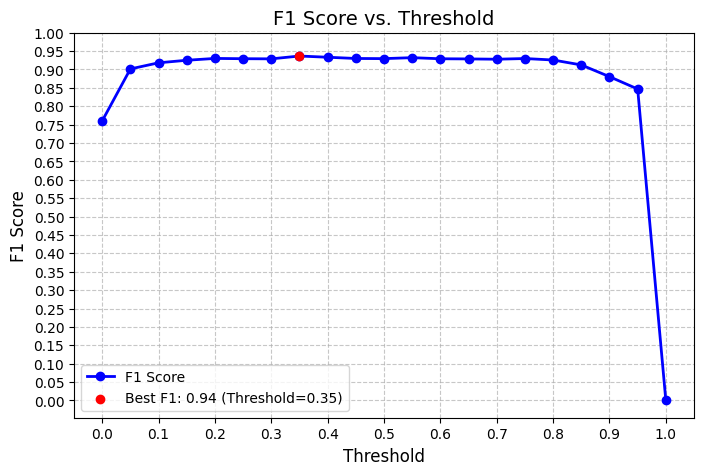

In [164]:
#TODO

#iterate through different thresholds in 0.05 steps and calculate f1 score
thresholds = np.arange(0, 1.05, 0.05)
f1_scores = []

for threshold in thresholds:
    y_pred = (results.predict(X_test) > threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-', markersize=6, linewidth=2, color='b', label='F1 Score')

# Highlight the best F1 score
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
plt.scatter(best_threshold, best_f1, color='red', zorder=3, label=f'Best F1: {best_f1:.2f} (Threshold={best_threshold:.2f})')

# Labels and formatting
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('F1 Score vs. Threshold', fontsize=14)
plt.xticks(np.arange(0, 1.1, 0.1))  # Adjust x-axis for better readability
plt.yticks(np.arange(0, 1.05, 0.05))  # Adjust y-axis for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better visibility
plt.legend()
plt.show()


The optimal threshold that maximizes the F1-score from the graph shows to be 0.35, with a corresponding F1-score of 0.94. This threshold balances precision and recall effectively, ensuring the model maintains strong performance in correctly identifying positive cases while minimizing false positives and false negatives. The graph shows that the F1-score remains relatively stable across a range of thresholds but starts declining sharply as the threshold approaches 1.0. This makes sense, as setting the threshold too high would reduce the number of positive predictions, decreasing recall, while setting it too low would increase recall but at the cost of more false positives, lowering precision. Choosing 0.35 as the threshold provides the best trade-off between these metrics, optimizing overall classification performance.

**3.3(23 pts) Free model exploration**

Use any model from `sklearn` to predict whether a car will be sold within the first three months.

Follow these steps to complete the task:

1. (2 pts) Train your own classifier model to predict the target variable (`sold_within_3_months`).You can reuse the train and test sets from the previous section. Set `random_state=42` for reproducibility if needed. At this stage no need to optimize (yet). That will come at step 4.

In [165]:
#TODO

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Create XGBoost model

from sklearn.ensemble import RandomForestClassifier
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

2. (2 pts) Evaluate the model on the test set and report on hyperparameters or other details of the algorithm you chose.

In [166]:
#TODO

# Predict probabilities & convert to binary (threshold = 0.5)
y_pred_train = (rf_model.predict(X_train) > 0.5).astype(int)
y_pred_test = (rf_model.predict(X_test) > 0.5).astype(int)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Precision
train_precision = precision_score(y_train, y_pred_train)
test_precision = precision_score(y_test, y_pred_test)
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)

# Recall
train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)

# F1 Score
train_f1_score = f1_score(y_train, y_pred_train)
test_f1_score = f1_score(y_test, y_pred_test)
print("Train F1 Score:", train_f1_score)
print("Test F1 Score:", test_f1_score)

# ROC AUC
train_roc_auc = roc_auc_score(y_train, y_pred_train)
test_roc_auc = roc_auc_score(y_test, y_pred_test)
print("Train ROC AUC:", train_roc_auc)
print("Test ROC AUC:", test_roc_auc)

# Classification Report (Per Class Accuracy)
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_test))


Train Accuracy: 1.0
Test Accuracy: 0.9094076655052264
Train Precision: 1.0
Test Precision: 0.9166666666666666
Train Recall: 1.0
Test Recall: 0.9375
Train F1 Score: 1.0
Test F1 Score: 0.9269662921348315
Train ROC AUC: 1.0
Test ROC AUC: 0.9011824324324326
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       444
           1       1.00      1.00      1.00       704

    accuracy                           1.00      1148
   macro avg       1.00      1.00      1.00      1148
weighted avg       1.00      1.00      1.00      1148

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       111
           1       0.92      0.94      0.93       176

    accuracy                           0.91       287
   macro avg       0.91      0.90      0.90       287
weighted avg       0.91      0.91      0.91       287



3. (2 pts) Come up with a visualization (could be related to the model or to some variables (e.g. EDA plots) to demonstrate the difficulty (or not) of the problem. 

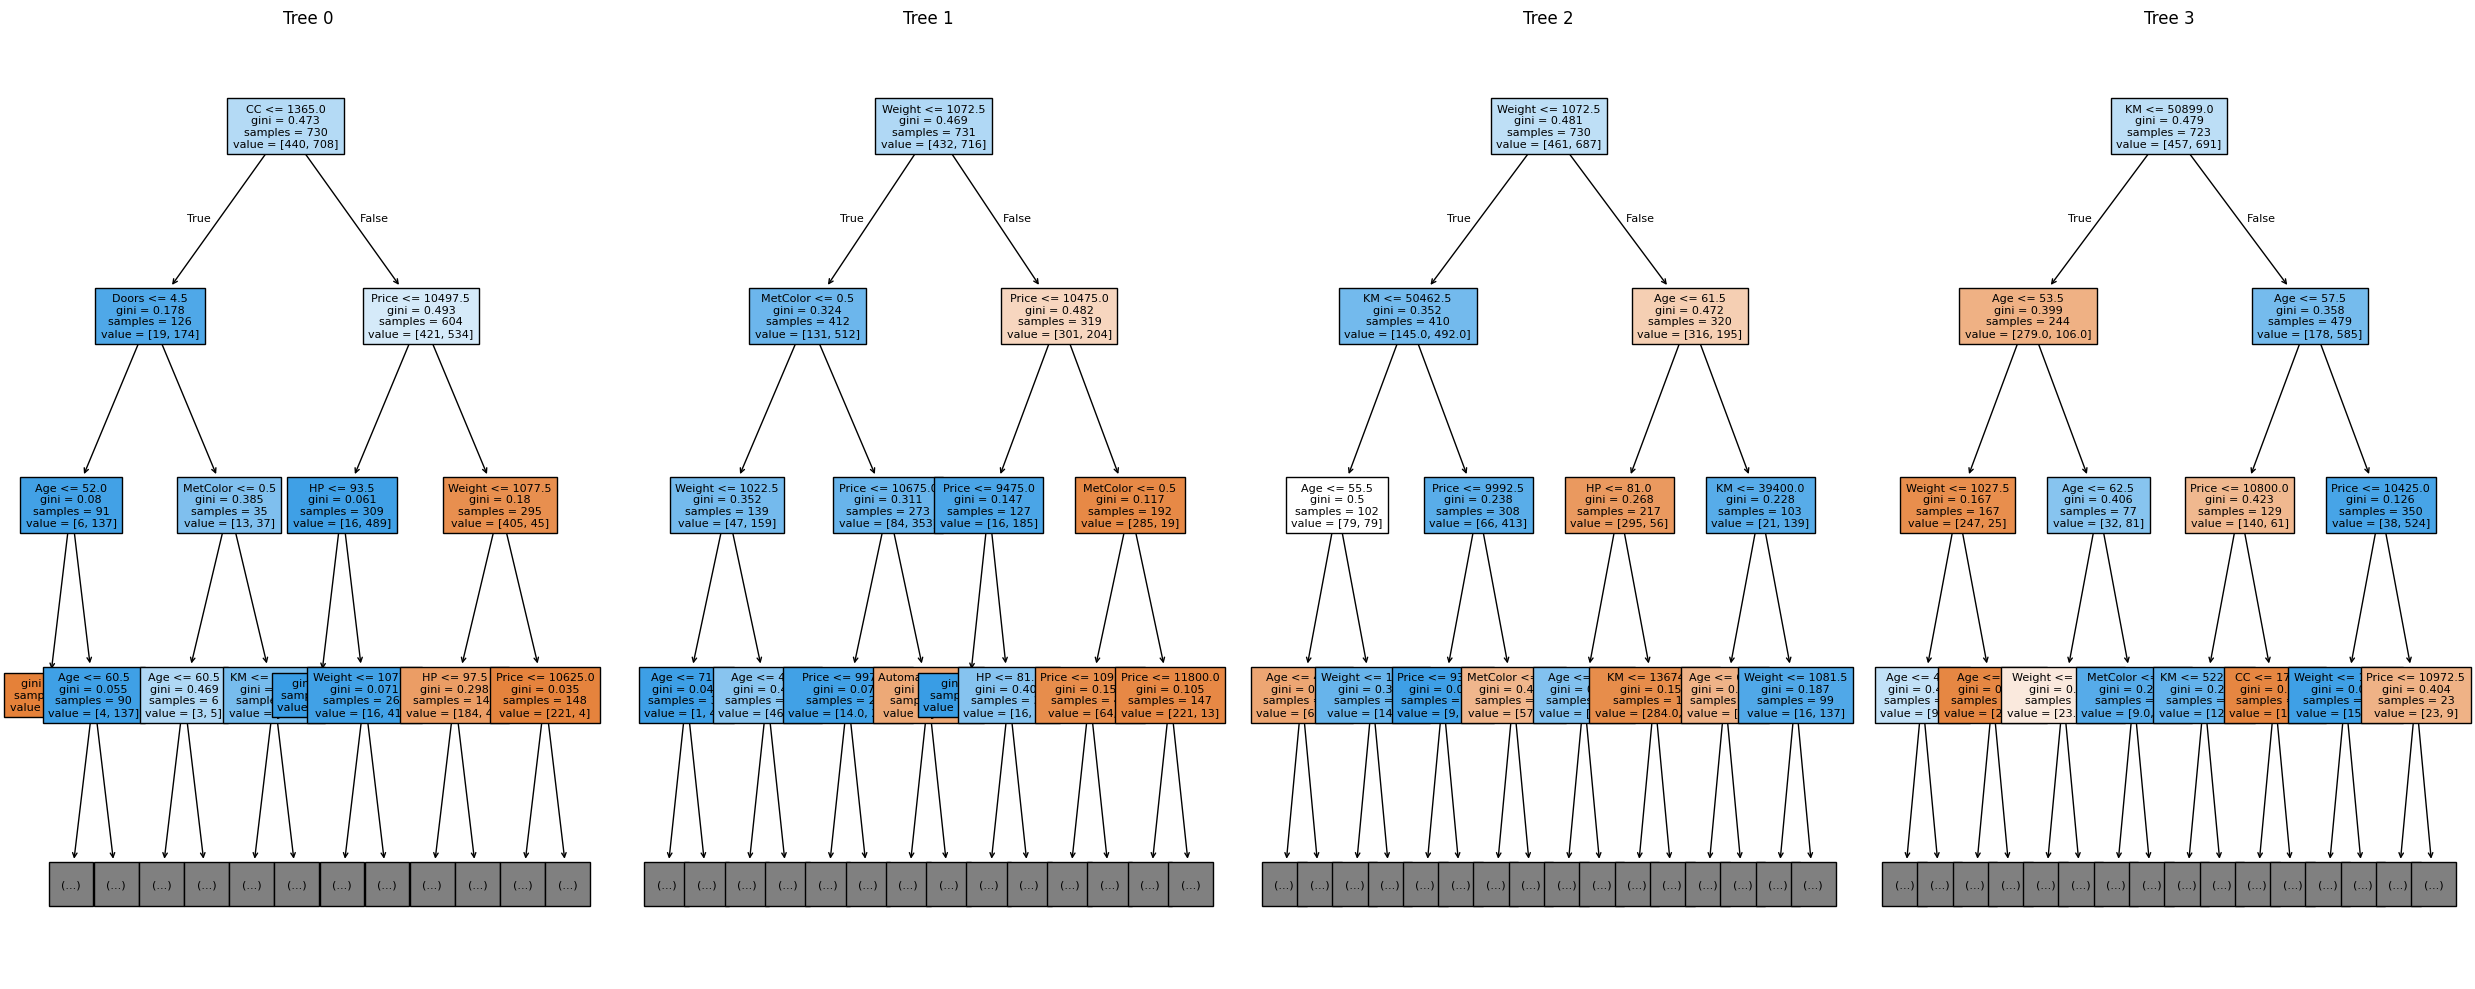

In [167]:
#TODO

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Ensure feature names match the training data
feature_names = list(X_train.columns)

# Limit the number of trees to the actual number available in rf_model
num_trees_to_plot = 4

# Create subplots with increased size
fig, axes = plt.subplots(nrows=1, ncols=num_trees_to_plot, figsize=(25, 10))

# If only one tree is being plotted, adjust for a single-axis case
if num_trees_to_plot == 1:
    axes = [axes]

# Plot each selected tree with limited depth and smaller font size
for index in range(num_trees_to_plot):
    plot_tree(rf_model.estimators_[index], feature_names=feature_names, filled=True, fontsize=8, ax=axes[index], max_depth=3)
    axes[index].set_title(f'Tree {index}', fontsize=12)

plt.tight_layout()
plt.show()





4. (17 pts) Try to come up with a model that improves the results both in the previous seciton but also your baseline model in 3.1. Make to sure to properly evaluate the model. No need to provide a visualization here but feel free to add any supporting evidence to your modeling.

Minimally (and for a high-grade) you should consider some form of regularization and proper cross-validation. 

Other things you can consider (in no particular order) are feature engineering, model robustness, hyperparameter tuning, ...

In [ ]:
#TODO

from sklearn.model_selection import RandomizedSearchCV

# In this section, we aim to improve upon both our previous model and the baseline model (from section 3.1) by applying
# advanced hyperparameter tuning and regularization techniques. We will use RandomizedSearchCV to efficiently search
# through a large hyperparameter space for our Random Forest model. This approach not only allows us to find the best
# combination of parameters but also ensures robust evaluation using 5-fold cross-validation. The inclusion of regularization
# parameters (such as 'ccp_alpha' and 'min_impurity_decrease') helps in controlling overfitting, leading to a more generalizable model.

# Import the RandomizedSearchCV module
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid to explore. Each key corresponds to a hyperparameter in the Random Forest model:
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],       # Number of trees in the forest
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],  # Maximum depth of each tree
    'min_samples_split': [2, 4, 6, 8, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3, 4, 5],             # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7, 1.0],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False],                      # Whether bootstrap samples are used when building trees
    'min_impurity_decrease': [0.0, 0.01, 0.1],         # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1]              # Complexity parameter used for Minimal Cost-Complexity Pruning to prevent overfitting
}

# Create the RandomizedSearchCV object:
# - 'estimator': our baseline random forest model (rf_model)
# - 'param_distributions': the hyperparameter grid we want to search over
# - 'n_iter': number of parameter settings sampled (here, 200 different combinations)
# - 'cv': 5-fold cross-validation to robustly evaluate each parameter combination
# - 'verbose': set to 2 to get detailed logs of the search progress
# - 'random_state': fixed for reproducibility
# - 'n_jobs': using all available CPU cores to speed up the search
# - 'scoring': using the F1 score as the metric for evaluating performance
rf_random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_dist, 
    n_iter=1000, 
    cv=5, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1,
    scoring='f1'
)

# Fit the RandomizedSearchCV object on the training data to perform the hyperparameter search.
rf_random_search.fit(X_train, y_train)

# Retrieve the best hyperparameters found during the search.
best_params = rf_random_search.best_params_
print("Best parameters:", best_params)

# The best model (with the optimal hyperparameters) is stored as the best estimator.
best_rf_model = rf_random_search.best_estimator_

# Comments were created with ChatGPT for clarification.



Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.0, 'max_features': 'sqrt', 'max_depth': 45, 'ccp_alpha': 0.0, 'bootstrap': True}


In [169]:
# Predict binary labels
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Precision
train_precision = precision_score(y_train, y_pred_train)
test_precision = precision_score(y_test, y_pred_test)
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)

# Recall
train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)

# F1 Score
train_f1_score = f1_score(y_train, y_pred_train)
test_f1_score = f1_score(y_test, y_pred_test)
print("Train F1 Score:", train_f1_score)
print("Test F1 Score:", test_f1_score)

# ROC AUC
train_roc_auc = roc_auc_score(y_train, y_pred_train)
test_roc_auc = roc_auc_score(y_test, y_pred_test)
print("Train ROC AUC:", train_roc_auc)
print("Test ROC AUC:", test_roc_auc)

# Classification Report (Per Class Accuracy)
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_test))


Train Accuracy: 0.9433797909407665
Test Accuracy: 0.9198606271777003
Train Precision: 0.9493670886075949
Test Precision: 0.9226519337016574
Train Recall: 0.9588068181818182
Test Recall: 0.9488636363636364
Train F1 Score: 0.9540636042402827
Test F1 Score: 0.9355742296918768
Train ROC AUC: 0.9388628685503686
Test ROC AUC: 0.911368755118755
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       444
           1       0.95      0.96      0.95       704

    accuracy                           0.94      1148
   macro avg       0.94      0.94      0.94      1148
weighted avg       0.94      0.94      0.94      1148

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       111
           1       0.92      0.95      0.94       176

    accuracy                           0.92       287
   macro avg       0.92      0.91      0.91       28

## Comment by group:

Test f1 score improvement by 0.01 this is actually good, since the our baseline logistic regression model is already very powerful. However due to regularisation, gridsearch, cross validation and we were able to get this improvement.

## Part 4 The Aftermath (5 pts)

Machine learning models are often evaluated based on accuracy, precision and recall, but these metrics do not always capture fairness. Fairness is a broader concept that depends on the context of the dataset and the decisions influenced by the model.

For this last question, you are asked to reflect on what fairness means in the context of this problem. More specifically, identify potential fairness concerns (at least 2) and suggest how they could be measured or mitigated.
Explain why fairness matters (or doesn’t) in this specific context.

*Hint: Think of the whole pipeline of data science: data collection, modeling, evaluation and identify sources of where the model might be unfair.*


Your Response:
Fairness is a critical consideration in the context of predicting car sales within three months, as it can impact the company's sales strategy, customer relationships, and overall business success. Two potential fairness concerns in this scenario are:

1. **Bias in Data Collection**: If the dataset used to train the model is biased, the model may learn and perpetuate existing biases. For example, if the data disproportionately represents certain car types, fuel types, or price ranges, the model may struggle to accurately predict sales for underrepresented groups. To measure and mitigate this bias, the company should ensure that the dataset is diverse and representative of the entire car inventory. This can be achieved by collecting data from a wide range of sources, ensuring that all car types, fuel types, and price ranges are adequately represented. Additionally, the company should regularly audit the dataset for bias and take corrective action as needed.

2. **Model Fairness**: The model itself may introduce bias if it is not designed to be fair. For example, if the model assigns higher probabilities of selling within three months to certain car types or fuel types, it may inadvertently favor those groups over others. To measure and mitigate this bias, the company should evaluate the model's predictions across different demographic groups, car types, and fuel types. This can be done by calculating fairness metrics such as disparate impact, equal opportunity, and predictive parity. If the model is found to be biased, the company should adjust the model's decision boundary, retrain the model on a more balanced dataset, or use fairness-aware algorithms to ensure equitable predictions.

//**//